# Todo

## Librerias

In [6]:
%cd ..
!ls

/scratch/tfg_luis_2223
drive	    LightX3ECGPrivate	PrediccionesLightX3ECG.ipynb
LightX3ECG  MostrarCasos.ipynb


In [7]:
!git clone https://github.com/lhkhiem28/lightx3ecg #Repo Khiem
#!git clone https://github.com/isma40000/LightX3ECG.git #Fork nuestro

Clonando en 'lightx3ecg'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 231 (delta 23), reused 20 (delta 18), pack-reused 200
Recibiendo objetos: 100% (231/231), 658.06 KiB | 4.36 MiB/s, listo.
Resolviendo deltas: 100% (115/115), listo.


In [ ]:
# !pip install sierraecg &> /dev/null
# !pip install h5py &> /dev/null
# !pip install wfdb &> /dev/null
# !pip install tensorflow &> /dev/null
# !pip install xmljson &> /dev/null
# !pip install tqdm &> /dev/null


# !pip3 install pytorch_lightning &> /dev/null
# !pip3 install neurokit2 &> /dev/null
# !pip3 install captum &> /dev/null
# !pip3 install keras &> /dev/null
# !pip3 install keras_preprocessing &> /dev/null

### Comprobar si están todos los numpy necesarios

In [ ]:
!cd drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy

In [8]:
!ls -1 drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy | tail -5

JS10642.npy
JS10643.npy
JS10644.npy
JS10645.npy
JS10646.npy


In [ ]:
''' import numpy as np
import pandas as pd
from numpy import zeros, newaxis
import h5py
import wfdb
import wfdb.io.convert.csv
from pkgutil import iter_modules
import scipy.signal  as sgn
from xmljson import badgerfish as bf
from xml.etree.ElementTree import fromstring
import base64
import os
import time
from sierraecg import read_file
import sierraecg.lib as sl

os.system("cp -a /content/drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/. /content/") '''

### Modificar archivo lib


Modificar libs.py para que tenga keras_preprocessing. https://stackoverflow.com/questions/72326025/cannot-import-name-pad-sequences-from-keras-preprocessing-sequence

In [ ]:
!echo -e 'import os, sys;\nimport warnings; warnings.filterwarnings("ignore")\nimport pytorch_lightning;\npytorch_lightning.seed_everything(22);\nfrom tqdm import tqdm;\nimport argparse;\nimport random;\nimport pandas, numpy as np;\nimport neurokit2 as nk;\nimport torch;\nimport torch.nn as nn, torch.optim as optim;\nimport torch.nn.functional as F;\nimport torch.nn.utils.prune as prune;\nimport captum.attr as attr;\nimport matplotlib.pyplot as pyplot;\nfrom keras_preprocessing.sequence import pad_sequences;\nfrom sklearn.metrics import f1_score;\n' > /content/LightX3ECG/source/libs.py

In [1]:
import importlib.util
import sys
import os

module_path = os.path.join(os.getcwd(), 'source')
sys.path.append(module_path)

# import tensorflow.keras as keras
spec = importlib.util.spec_from_file_location("module.name", "./source/libs.py")
foo = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = foo
spec.loader.exec_module(foo)
# foo.MyClass()
spec = importlib.util.spec_from_file_location("module.name", "./source/configVars.py")
foo = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = foo
spec.loader.exec_module(foo)

Global seed set to 22


In [ ]:
casos = ['A0192','A1778','A5452','A0370','A1007','A2472','A0741',
         'A3811','A5868','A0977','A1213','A1754','A0345','A2701',
         'A3568','A3046','A3342','A3525','A2808','A3542','A6343',
         'A0432','A0984','A2260','A0054','A5431','A5673']
casos.sort()
print(casos)


['A0054', 'A0192', 'A0345', 'A0370', 'A0432', 'A0741', 'A0977', 'A0984', 'A1007', 'A1213', 'A1754', 'A1778', 'A2260', 'A2472', 'A2701', 'A2808', 'A3046', 'A3342', 'A3525', 'A3542', 'A3568', 'A3811', 'A5431', 'A5452', 'A5673', 'A5868', 'A6343']


## Opciones comando train.py

In [14]:
!python3 train.py -h

Global seed set to 22
usage: train.py [-h] [--dataset DATASET] [--num_classes NUM_CLASSES]
                [--multilabel] [--num_gpus NUM_GPUS]

optional arguments:
  -h, --help            show this help message and exit
  --dataset DATASET
  --num_classes NUM_CLASSES
  --multilabel
  --num_gpus NUM_GPUS


## Entrenar modelo + Predecir

### Chapman

In [25]:
%cd source
!python3 tools/train.py --dataset "Chapman" --num_classes 4 --num_gpus 4
%cd ..

/scratch/tfg_luis_2223/LightX3ECGPrivate/source
Global seed set to 22
Namespace(dataset='Chapman', multilabel=False, num_classes=4, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
epoch  1/ 1
----------------
100%|█████████████████████████████████████████| 135/135 [00:41<00:00,  3.22it/s]
########################PRIMER PUNTO_TRAIN############################
Forma de las running_labels: (8505,)

[1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 3, 0, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1, 0, 2, 1, 3, 2, 2, 3, 0, 1, 3, 2, 2, 2, 1, 1, 0, 2, 3, 0, 2, 1, 2, 3, 1, 3, 1, 0, 3, 1, 2, 3, 0, 2, 1, 2, 2, 0, 3, 1, 2, 1, 1, 1, 2, 2, 0, 0, 3, 2, 2, 0, 1, 3, 2, 3, 3, 3, 0, 2, 3, 1, 2, 2, 0, 3, 2, 1, 3, 0, 1, 2, 2, 2, 3, 0, 3, 0, 2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1, 0, 3, 1, 0, 1, 1, 1, 3, 3, 2, 1, 3, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 2, 3, 3, 1, 0, 3, 1, 3, 2, 1, 0, 3, 2, 2, 3, 2, 0, 3, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 3, 3, 1, 3, 2, 1, 3, 2, 1, 1, 2, 3, 1, 3, 2, 3, 0, 1, 2, 0, 2, 3, 2, 1, 1, 

In [5]:
%cd source
!python3 tools/predict.py --dataset "Chapman" --num_classes 9 --multilabel --num_gpus 4
%cd ..

/scratch/tfg_luis_2223/LightX3ECGPrivate/source
Global seed set to 22
100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.17s/it]

(18, 9)

[array([9.9432063e-01, 6.8678516e-03, 2.4925689e-03, 5.5996697e-06,
       2.3427798e-05, 4.4658751e-05, 6.1936502e-04, 8.6476386e-05,
       1.3120396e-01], dtype=float32), array([2.2371585e-04, 1.2754495e-07, 9.9871194e-01, 1.1462319e-04,
       9.2495538e-05, 1.8329858e-03, 1.4670632e-05, 9.5469615e-05,
       7.3622908e-03], dtype=float32), array([9.0681118e-01, 6.7681125e-05, 2.0335477e-03, 6.4884647e-05,
       6.3042557e-05, 1.0013755e-02, 2.4165246e-03, 5.5445533e-04,
       1.4090148e-01], dtype=float32), array([2.6080493e-02, 8.3533311e-01, 8.7210955e-03, 8.0422703e-03,
       1.1490795e-04, 1.2717454e-01, 1.2875887e-04, 3.6404024e-06,
       1.8415127e-02], dtype=float32), array([3.5844519e-06, 1.1824021e-03, 1.3169744e-04, 1.1522337e-02,
       3.2911643e-02, 7.2515659e-02, 9.9816985e-02, 4.8697717e-04,
       6.012

In [8]:
%cd source
!python3 tools/predict.py --dataset "Chapman" --num_classes 4 --num_gpus 4
%cd ..

/scratch/tfg_luis_2223/LightX3ECGPrivate/source
Global seed set to 222
^C
/scratch/tfg_luis_2223/LightX3ECGPrivate


### CPSC-2018

In [10]:
%cd source
!python3 tools/train.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4
%cd ..

/scratch/tfg_luis_2223/LightX3ECGPrivate/source
Global seed set to 222
Namespace(dataset='CPSC-2018', multilabel=True, num_classes=9, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
^C
/scratch/tfg_luis_2223/LightX3ECGPrivate


In [27]:
%cd LightX3ECG/source/
!python3 tools/train.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4

[Errno 2] No such file or directory: 'LightX3ECG/source/'
/scratch/tfg_luis_2223/LightX3ECG/source
Global seed set to 22
Namespace(dataset='CPSC-2018', multilabel=True, num_classes=9, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
epoch  1/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.14it/s]
epoch  2/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.02it/s]
epoch  3/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.18it/s]
epoch  4/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  6.90it/s]
epoch  5/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  6.93it/s]
epoch  6/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.01it/s]
epoch  7/70
----------------
100%|█████████████████████████████████████████

In [20]:
%cd LightX3ECG/source/
!python3 tools/predict.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4

[Errno 2] No such file or directory: 'LightX3ECG/source/'
/scratch/tfg_luis_2223/LightX3ECG/source
Global seed set to 22
100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.72s/it]
El reshapeo del array(33, 9)
El reshapeo del array(33, 9)
Forma de las running_labels:

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 

--dataset --> puede ser "Chapman" o "CPSC-2018", si no lo pones no corre

--num_classes --> número de posibles enfermedades parece

--multilabel --> se pone o no,no hace nada falta poner nada más

### Fragmento de código para debugear + Batch_Size

Parece ser que peta por espacio si los batch_size son demasiado grandes, esto se cambia en train.py, linea 26-45. Además este código de debajo permite ver cómo está repartida la memoria de CUDA.

In [ ]:
# %env PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:1024
import os
import torch
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = "max_split_size_mb:1024"
#!export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512'
#!echo $PYTORCH_CUDA_ALLOC_CONF
#torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

## Convertir .mat a numpy y distintos formatos de numpy

### Mat a numpy

Carga los archivos .mat de un directorio y los guarda en formato .npy

**Variables**\
fsource : path del archivo .mat\
fdest : path del archivo .npy\
data : array del archivo .mat

In [ ]:
import scipy.io
import numpy as np
import os

def toNumpy(source,dest,name):
    for filename in os.listdir(source):
        fsource = os.path.join(source, filename)
        fdest= os.path.join(dest, filename)

        if os.path.isfile(fsource) and fsource.endswith('.mat'):
            mat = scipy.io.loadmat(fsource)
            data = mat[name]
            np.save(fdest[:-4], data)

#### CPSC-2018

In [ ]:
source = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/'
dest = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy/'

toNumpy(source,dest,"ECG")

#### Chapman

In [ ]:
source = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/'
dest = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy/'

toNumpy(source,dest,"val")

### Extraer arrays

Cogemos los casos numpy y guardamos solo los arrays de los leads

In [1]:
# import scipy.io
# import numpy as np
# import os
# def transformNumpy(source,dest,div=1,endfilter=".npy"):
#   for filename in os.listdir(source):
#     fsource = os.path.join(source, filename)
#     fdest= os.path.join(dest, filename)

#     if os.path.isfile(fsource) and fsource.endswith(endfilter):

#         # save np.load
#         np_load_old = np.load

#         # modify the default parameters of np.load
#         np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

#         # call load_data with allow_pickle implicitly set to true
#         data = np.load(fsource)
#         if div not in [0,1]:
#           data = data/div
#         # restore np.load for future normal usage
#         np.load = np_load_old

#         np.save(fdest[:-4], data)

# for i in range(1,6):
#     transformNumpy('drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy',
#                'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy/',200,f"Caso{i}.npy")

### Trasnformar CSV a numpy

In [2]:
from numpy import genfromtxt
import scipy.io
import numpy as np
import os
def CSVtoNumpy(source,dest="",div=1):
    for filename in os.listdir(source):
        print(filename)
        fsource = os.path.join(source, filename)
        fdest= os.path.join(dest, filename)

        if os.path.isfile(fsource) and fsource.endswith('.csv') and not os.path.isfile(f"{fdest[:-4]}.npy"):
            try:
                mat = genfromtxt(fsource,skip_header=1, delimiter=',')
                data = mat.transpose()
                data = data/div
                np.save(fdest[:-4], data)
            except:
                print(f"Este archivo da error: {fsource}\n")
# Este archivo da error: drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/ECGDataDenoised/MUSE_20180113_124215_52000.csv --> Tenía una fila incompleta, no mide 5000

In [3]:
source = './datasets/Casos/Chapman/ECGDataRaw/'
# dest = './datasets/Casos/Chapman/ECGDataRawNpy/'
dest = './datasets/Casos/Chapman/ECGDataRawNpy-1000/'
CSVtoNumpy(source,dest,1000)

MUSE_20180113_182003_59000.csv
MUSE_20180210_131141_00000.csv
MUSE_20180113_130900_58000.csv
MUSE_20180114_130626_59000.csv
MUSE_20180116_124337_38000.csv
MUSE_20180113_130133_93000.csv
MUSE_20180115_120155_52000.csv
MUSE_20180115_132307_47000.csv
MUSE_20180116_131054_15000.csv
MUSE_20180112_133451_95000.csv
MUSE_20180113_122710_41000.csv
MUSE_20180118_172927_52000.csv
MUSE_20180209_132225_14000.csv
MUSE_20180114_125730_64000.csv
MUSE_20180114_120046_43000.csv
MUSE_20180114_122307_96000.csv
MUSE_20180115_131209_79000.csv
MUSE_20180114_125321_24000.csv
MUSE_20180115_131421_38000.csv
MUSE_20180115_124955_18000.csv
MUSE_20180113_132417_70000.csv
MUSE_20180114_134326_09000.csv
MUSE_20180209_122935_12000.csv
MUSE_20180210_130216_70000.csv
MUSE_20180113_080538_65000.csv
MUSE_20180118_170407_66000.csv
MUSE_20180118_134613_53000.csv
MUSE_20180116_132226_77000.csv
MUSE_20180115_134938_44000.csv
MUSE_20181222_204155_31000.csv
MUSE_20180209_172948_27000.csv
MUSE_20180210_120335_27000.csv
MUSE_201

### Dividir caso numpy

In [ ]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep
def divNumpy(source):
    
    for filename in os.listdir(source):
        fsource = os.path.join(source, filename)

        if os.path.isfile(fsource) and fsource.endswith('.npy'):

            data = np.load(fsource)
            data=data/1000
            np.save(os.path.join(f'{source}EntreMil',f'{filename[:-4]}'),data)
divNumpy('datasets/Casos/Chapman/CasosNumpy')

### Eliminar baseline

In [32]:
import numpy as np
import scipy.signal  as sgn
def remove_baseline_filter(sample_rate):
    fc = 0.8  # [Hz], cutoff frequency
    fst = 0.2  # [Hz], rejection band
    rp = 0.5  # [dB], ripple in passband
    rs = 40  # [dB], attenuation in rejection band
    wn = fc / (sample_rate / 2)
    wst = fst / (sample_rate / 2)

    filterorder, aux = sgn.ellipord(wn, wst, rp, rs)
    sos = sgn.iirfilter(filterorder, wn, rp, rs, btype='high', ftype='ellip', output='sos')

    return sos

In [7]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep
def removeBaselineCompare(source,sample_rate=500):
    # i=1
    # for filename in os.listdir(source):
    for filename in ["Caso1.npy","Caso2.npy","Caso3.npy","Caso4.npy","Caso5.npy","Caso6.npy"]:
        fsource = os.path.join(source, filename)

        # if os.path.isfile(fsource) and fsource.endswith(f'Caso{i}.npy'):
        if os.path.isfile(fsource) and fsource.endswith('.npy'):

            data = np.load(fsource)
            fSample=500
            xml_leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
            
            ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}")
            
            sos = remove_baseline_filter(fSample)
            data = sgn.sosfiltfilt(sos, data, padtype='constant', axis=-1)
            ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}-NoBaseLine")
            sos2 = remove_baseline_filter(fSample)
            data2 = sgn.sosfiltfilt(sos2, data, padtype='constant', axis=-1)
            ep.plot(data2, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}-NoBaseLine^2")
            print(data)
            print(data2)
            print(np.array_equal(data,data2))
            break
            # np.save(os.path.join(source,f'Caso{i}-NoBL'),data)
            # np.save(os.path.join(source,f'{filename[:-4]}-NoBL'),data)
        #     i+=1
        # if(i>7):
        #     break
def removeBaselineFromFolder(source,sample_rate=500):
    folder = os.path.basename(source)
    # NoBLPath = f"{source}-NoBaseLine"
    NoBLPath = f"{source}"
    print(NoBLPath)
    if os.path.exists(NoBLPath):
        for filename in os.listdir(source):
            fsource = os.path.join(source, filename)
            if os.path.isfile(fsource) and fsource.endswith('.npy'):
                data = np.load(fsource)
                # data = data*1000
                # fSample=500
                # sos = remove_baseline_filter(fSample)
                data=data[:,1:]
                # data = sgn.sosfiltfilt(sos, data, padtype='constant', axis=-1)
                # data = data/1000
                # np.save(os.path.join(NoBLPath,f'{filename[:-4]}-NoBL'),data)
                np.save(os.path.join(NoBLPath,f'{filename[:-4]}'),data)
    
removeBaselineFromFolder('datasets/Casos/Chapman/ECGDataRawNpy')

datasets/Casos/Chapman/ECGDataRawNpy


## Hacer one_hot a los CSV de Chapman

In [28]:
!ls

datasets  MostrarCasos.ipynb  PrediccionesLightX3ECG.ipynb  README.md  source


In [36]:
from libs import *
from configVars import *
pathDataset=f"{pathCasos[1:]}Chapman/" #Cuidado, puede variar según donde estés situado en ese momento, se ve con ls
sourceCSV="pred.csv"
destCSV="predOHE-9Labels.csv"
df = pandas.read_csv(f"{pathDataset}{sourceCSV}")

possibilites = [0, 1, 2, 3, 4, 5, 6, 7, 8]

exists = df["label"].tolist()

difference = pandas.Series([item for item in possibilites if item not in exists])#Lista por compresión con elementos posibles no presentes en el dataset

target = df["label"].append(pandas.Series(difference))#Añades la serie pandas de valores no presentes en el dataset a la serie label

target = target.reset_index(drop=True)

one_hot = pandas.get_dummies(target,prefix='label')

one_hot = one_hot.drop(one_hot.index[list(range(len(one_hot)-len(difference), len(one_hot)))])

# Get one hot encoding of columns B
# one_hot = pandas.get_dummies(df['label'],prefix='label')
# Drop column B as it is now encoded
# df = df.drop('B',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df = df[['id', 'age', 'sex', 'label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7','label_8', 'r_count','length']]
df.head()
df.to_csv(f"{pathDataset}{destCSV}", index=False)
# cols = df.columns.tolist()
# cols

## Observar un caso

Observar un caso numpy para ver su formato

In [4]:
%cd ..
!ls

/scratch/tfg_luis_2223/LightX3ECGPrivate
datasets  MostrarCasos.ipynb  PrediccionesLightX3ECG.ipynb  README.md  source


(12, 7500)
[[ 0.0282288   0.0392288   0.0452288  ...  0.2582288   0.2592288
   0.2592288 ]
 [ 0.00672947  0.01072947  0.01472947 ...  0.24772947  0.24872947
   0.24972947]
 [-0.02149933 -0.02849933 -0.03049933 ... -0.01049933 -0.01049933
  -0.00949933]
 ...
 [-0.11200653 -0.11000653 -0.10800653 ...  0.19399347  0.19399347
   0.19499347]
 [-0.5959572  -0.5899572  -0.5819572  ...  0.3070428   0.3070428
   0.3070428 ]
 [-0.01558507 -0.00658507  0.00241493 ...  0.21341493  0.21441493
   0.21441493]]


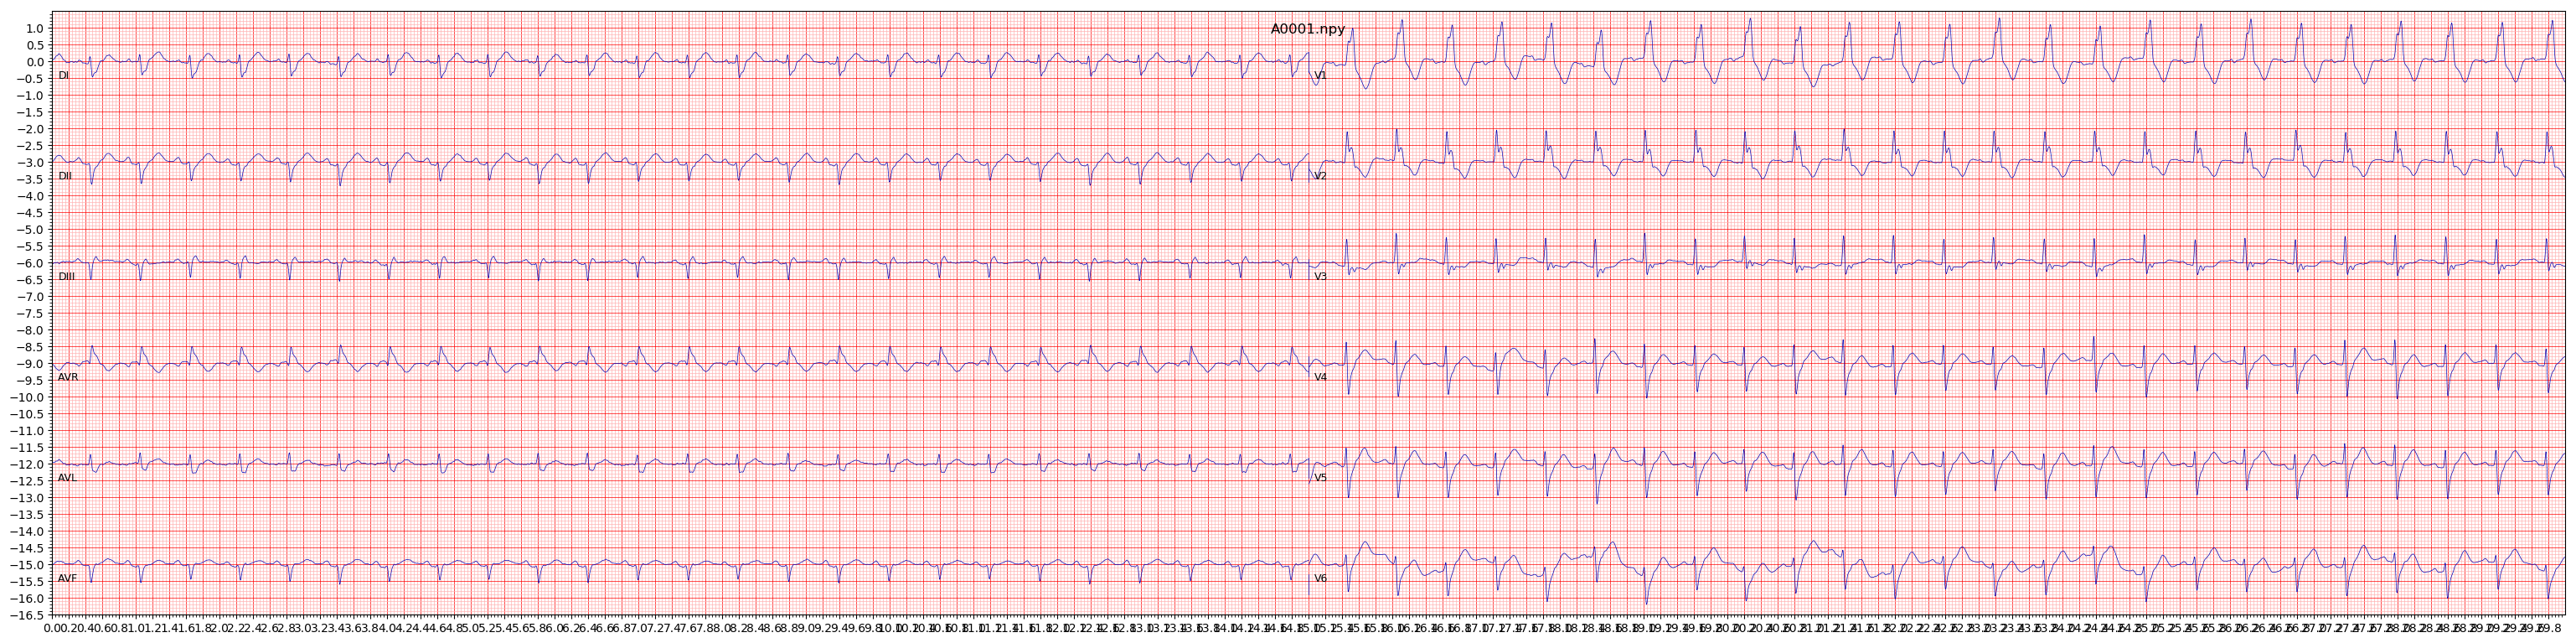

In [1]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep

# def ObservarCaso(source='datasets/Casos/Chapman/ECGDataRawNpy',casename='MUSE_20180111_155115_19000.npy',dataset="Chapman"):
def ObservarCaso(source='datasets/Casos/CPSC-2018/CasosNumpy',casename='A0001.npy',dataset="CPSC-2018"):
    
    div = 1000 if dataset =="Chapman" else 1
    
    for filename in os.listdir(source):
        fsource = os.path.join(source, filename)

        if os.path.isfile(fsource) and fsource.endswith(casename):#MUSE_20180111_155115_19000

            # save np.load
            #np_load_old = np.load

            # modify the default parameters of np.load
            #np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

            # call load_data with allow_pickle implicitly set to true
            data = np.load(fsource)
            data = data/div
            fSample=500
            xml_leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
            ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}")
            
            print(data.shape)
            print(data)
            # restore np.load for future normal usage
            #np.load = np_load_old
            break;
ObservarCaso()

Se supone que con la versión de numpy 1.16.1 tiene el allow_pickle a True por defecto, lo que evita errores, igualmente es un último recurso usar una versión anterior.

In [ ]:
!pip install numpy==1.16.1

In [4]:
pip install sierraecg

  Could not find a version that satisfies the requirement sierraecg (from versions: )
No matching distribution found for sierraecg


## Recibir un caso y hacer predicciones

In [ ]:
def create_txt_file(filename, content):
    with open(filename, 'w') as file:
        file.write(content)

In [ ]:
def getTrainLoaderForPred(dataset="Chapman",multilabel=False,num_gpus=4):
    config = {
        "ecg_leads":[
            0, 1, 
            6, 
        ], 
        "ecg_length":5000, 
        "is_multilabel":multilabel, 
        "device_ids":list(range(num_gpus)), 
    }
    train_loaders = {
        "pred":torch.utils.data.DataLoader(
            ECGDataset(
                #Seguramente cuando se suba un caso esté todo guardado dentro de una carpeta temporal
                df_path = f"temp/pred{dataset}.csv", data_path = f"temp/", 
                config = config, 
                augment = False, 
            ), 
            num_workers = 8, batch_size = 64, 
            shuffle = False
            # ,drop_last=True
        )
    }
    return train_loaders

In [ ]:
def get_r_count(ecg):
    counts = []
    for i in range(ecg.shape[0]):
        try:
            count = len(nk.ecg_peaks(ecg[i, :], sampling_rate=500)[1]['ECG_R_Peaks'].tolist())
        except:
            count = 0
        counts.append(count)
    return max(set(counts), key = counts.count)

In [ ]:
def get_r_countFirst(train_loaders):
    #Actualmente devuelve el primero pero se podría cambiar para que devuelva una lista
    r_count=[]
    with torch.no_grad():
        for ecgs, labels in tqdm(train_loaders["pred"], disable = not training_verbose):
            r_count.extend(get_r_count(ecg) for ecg in ecgs)
            
    return r_count[0]
            

In [ ]:
import csv
def create_csv_file(id,age=30,sex=0,dataset="Chapman",r_count=0,length=5000):
    #Puede que sea posible eliminar el campo label si este no se carga en predict, comprobar más adelante
    if dataset =="Chapman":
        labels = ['id', 'age', 'sex', 'label_0', 'label_1', 'label_2', 'label_3', 'r_count', 'length']
        data = [id, age, sex, '0', '0', '0', '0', r_count, length]
    else:
        labels = ['id', 'age', 'sex', 'label_0', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7', 'label_8', 'r_count', 'length']
        data = [id, age, sex, '0', '0', '0', '0', '0', '0', '0', '0', '0', r_count, length]
    # Define the labels and data

    # Open the CSV file for writing
    with open(f'pred{dataset}.csv', mode='w', newline='') as file:
        # Create a CSV writer object
        writer = csv.writer(file)

        # Write the header row
        writer.writerow(labels)

        # Write the data row
        writer.writerow(data)


In [ ]:
def multiPredict(filePath,fileName):
    """
    Función cuya finalidad es realizar predicciones sobre un archivo usando los modelos entrenados de CPSC-2018, Chapman y Antonio

    ...
    
    Argumentos
    ----------
    filePath: Ruta del archivo sobre el cual quieres hacer las predicciones. Ej: ./datasets/temp/archivoEjemplo.csv
    fileName: Nombre del archivo
    """
    cwd = os.getcwd()#De momento se podría guardar el directorio inicial para volver a él una vez obtenido el WDFB
    os.chdir(filePath)#Cambiar el directorio actual para que la función siguiente cree el archivo ahí
    
    #Se escala los puntos y se elimina el rectángulo final, en nuestro caso ya están escalados así que se elimina el rectángulo y ya
    scalePointsDelSquare(f'{filePath}{fileName}.csv',f'{fileName}.csv')
    
    #Primero hay que transformar el archivo CSV a numpy, dividiendo entre 200 porque el formato recibido está escalado a 200
    #Ahora mismo la función transforma todos los archivos de una carpeta, se podría adaptar para que fuese uno específico
    CSVtoNumpy(filePath,filePath,200)
    
    #Creamos un archivo WFDB que será necesario para las predicciones de Antonio
    csvToWFDB(f'{fileName}',f'{fileName}')
    
    #Creamos un archivo txt del que leerá el código de Antonio para las predicciones
    create_txt_file(f"{fileName}.txt",fileName)
    
    #Usar el preprocesado de Antonio para sacar el archivo .h5 correspondiente a nuestro caso
    os.system(f"python {pathRelativoACarpetaTemp}ecg-preprocessing/generate_h5.py --scale 20 --use_all_leads --new_freq 400 --new_len 4096 RECORDS.txt {fileName}.h5")
    
    #Se realizan las predicciones de Antonio
    os.system(f"python automatic-ecg-diagnosis/predict.py {fileName}.h5  model/model.hdf5  --output_file {fileName}_Antonio")
    
    Antonio_preds= np.load(f"{fileName}_Antonio.npy")
    
    #Creamos el csv de predicciones de CPSC-2018
    create_csv_file(fileName,age=30,sex=0,dataset="CPSC-2018",r_count=get_r_countFirst(getTrainLoaderForPred("CPSC-2018",True,4)),length=5000)
    #Creamos el csv  de predicciones de Chapman
    create_csv_file(fileName,age=30,sex=0,dataset="Chapman",r_count=get_r_countFirst(getTrainLoaderForPred("Chapman",False,4)),length=5000)
    #Predecir Chapman, hay que mirar si nos interesa hacerlo multilabel también o no y ver qué devolvía exactamente uno y otro
    os.system(f"python tools/predict.py --dataset Chapman --num_classes 4 --num_gpus 4")
    #Predecir CPSC-2018
    os.system(f"python tools/train.py --dataset CPSC-2018 --num_classes 9 --multilabel --num_gpus 4")

    
    

## Apunte

Mirar función loadmat para poder abri los archivos .mat desde python. Mirar Scipy para esa función. 

Ejemplo: https://mdrk.io/end-to-end-example-of-a-deep-learning-based-project-in-healthcare-electrocardiograms-part-1/

Craft

Ejecutar desde scratch porque por red local va lento, en esas máquinas no hay limitación. Tiene 4 GPUs. Revisar cuantas leads usa y cuáles son. Probar con Chapman y predecir cuando el modelo esté guardado en una carpeta persistente.

* ~~Comprobar r_count (número de latidos) y sacar datos de val y train para usar de test sin que se haya entrenado con ello.~~
* ~~Revisar el formato de los datos nuestros Caso1-6.Recordar lo de los 200 mV.~~
* ~~Mover los datos al directorio scratch.~~
* ~~Subir epoch a 70.~~
* ~~Conseguir datos de Chapman que usa Khiem.~~
* Probar si el entrenamiento sin línea de base mejora los resultados de las predicciones. (baseline removal)
* ~~Comprobar si un caso al que se le ha quitado la baseline sigue igual si se la vuelves a quitar. --> Gráficamente parecen iguales pero los valores de los numpy arrays cambian~~
* ~~Representar los datos de test con ecg_plot. -->~~
* ~~Comprobar si los suyos son muy distintos de los nuestros al hacer un plot. Ver si puede haber línea base o qué. -->~~
* ~~Reproducir tabla 2 del paper (f1,precision,etc). Investigar dónde obtiene esas medidas.~~
* ~~Revisar qué labels se corresponden con qué enfermedad en Chapman.~~
* ~~Ajustar nuestros casos al formato csv de Chapman.~~

23/3/2023
* Comprobar a predecir Chapman con CPSC-2018. --> Para poder hacerlo hay que añadir columnas vacías al Chapman Onehot. Probar con columnas a 0 de la label_4 a las label_8 incluidas con el parametro num_classes a 9.
* Probar con casos (por ejemplo SB) coincidentes entre datasets.
* Conseguir entrenar con los modelos con resultados razonables.

* XML --> Sierra --> CSV --> Predecir --> Pasar de xml a CSV no parece posible con esta versión de python, requiere la 3.8, otras opciones también requieren permisos de sudo, requiere más investigación o probar en otro entorno de python con permisos.

* Crear repositorio privado con lo mismo que el actual y los casos si es posible.
* Recordar ver parte de teoría (vídeos,libro).

* Gradio --> la página de demostración no funciona??
* Streamlit --> transformar código de python a una web
* En ECGDataRawNpy hay una columna que tiene valores nan por algún motivo, lo q provoca problemas a la hora de eliminar la baseline y habrá que revisar si también a la hora de predecir